# Machine Learning with Python ch1 

In [ ]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

In [2]:
from sklearn.datasets import  load_iris
iris_dataset=load_iris() #로드하기

In [3]:
type(iris_dataset) 

sklearn.utils.Bunch

In [4]:
iris_dataset.keys()  # column 이름 보여줌

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(iris_dataset["DESCR"][:193]+"\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [6]:
print("Target names: {}". format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Feature names: {}". format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Type of data:{}".format(type(iris_dataset['data']))) #넘피 n차원 어레이

Type of data:<class 'numpy.ndarray'>


In [9]:
print("Shape of data:{}".format(iris_dataset['data'].shape)) #150개의 꽃, 4 종류의 features

Shape of data:(150, 4)


In [10]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5])) # [5.1 3.5 1.4 0.2] 가 첫번째 컬럼.

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [12]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [13]:
print("Target:\n{}".format(iris_dataset['target'])) #categircal, 0은 setosa 1은 veriscolor 2는 virginica

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
#트레인, 테스트 데이타셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) 
#X는 feature, y는 target

In [15]:
print("X_train shpae: {}".format(X_train.shape))
print("y_train shpae: {}".format(y_train.shape)) 

X_train shpae: (112, 4)
y_train shpae: (112,)


In [16]:
print("X_test shpae: {}".format(X_test.shape))
print("y_test shpae: {}".format(y_test.shape))

X_test shpae: (38, 4)
y_test shpae: (38,)


In [17]:
#X_train을 df로 만들기
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


d:\Users\Soyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


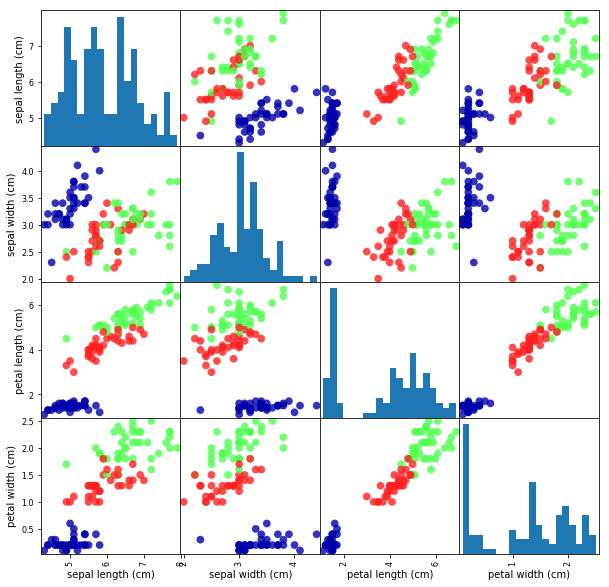

In [32]:
#scatter matrix 만들기
#pair plot, colored by class label
grr=pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [33]:
#knn 쓰기로함
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1) #이용할 model

In [34]:
knn.fit(X_train, y_train) #model을 data에 fit함

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
#prediction하기
X_new=np.array([[5, 2.9, 1, 0.2]]) #어떤 꽃의 측정값
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [40]:
prediction=knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("predicted target name:{}".format(iris_dataset['target_names'][prediction]))

Prediction:[0]
predicted target name:['setosa']


In [41]:
#evaluating model
y_pred=knn.predict(X_test)
print("test set prediction:\n {}".format(y_pred))

test set prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [42]:
print("test set score: {:.2f}".format(np.mean(y_pred==y_test))) #y_pred와 y_test가 같은 경우의 mean(?).

test set score: 0.97


In [44]:
print("test set core: {:.2f}".format(knn.score(X_test, y_test))) # test set score 계산하는 다른 방법

test set core: 0.97
